In [29]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import EngFormatter

In [40]:
plt.rcParams['figure.figsize'] = [14, 8]

In [26]:
def read_data(csv_path):
    data = pd.read_csv(csv_path)
    
    data['send_rate'] = 8 * data.bytes_sent / data.time
    data['recv_rate'] = 8 * data.bytes_received / data.time
    
    metadata = {
        'duration': np.max(data.time),
        'worker_count': len(np.unique(data.worker))
    }
    
    return data, metadata

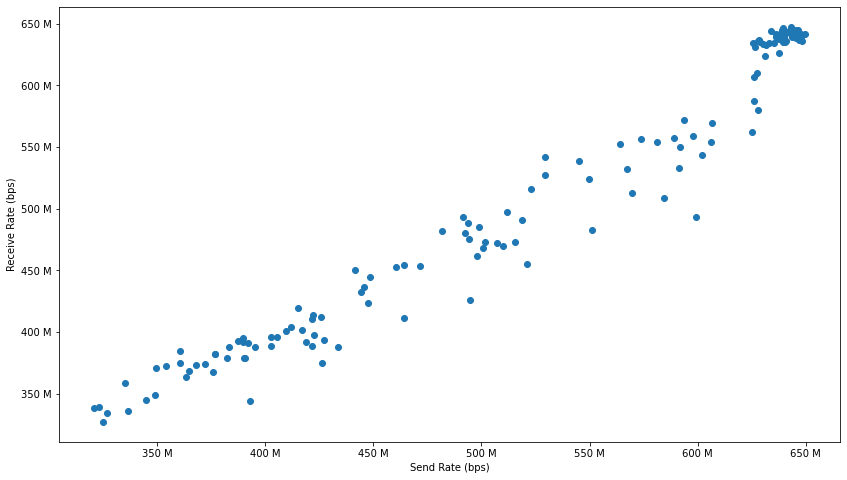

In [50]:
data, metadata = read_data("./results/lambda-a2a-w160-30s.csv")
x = data[data.time == metadata['duration']]
plt.scatter(x.send_rate, x.recv_rate)
plt.xlabel("Send Rate (bps)")
plt.ylabel("Receive Rate (bps)")
plt.gca().xaxis.set_major_formatter(EngFormatter(unit=''))
plt.gca().yaxis.set_major_formatter(EngFormatter(unit=''))